In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scp
import scipy.constants as cnt

In [6]:
rub_spec = np.loadtxt("data/rub_spec.dat")
jod = np.loadtxt("data/JodAbsorptionsspektrum/Zelle1_5,9V_5,12A.dat")
jod_transmission = jod[:,1]
jod_steps = jod[:,0]
rubidium = np.loadtxt("data/ReferenzSpektrum/2_ohne_Umgebungslicht.dat")
rubidium_transmission = rubidium[:,1]
rubidium_steps = rubidium[:,0]
(lower, upper) = (11e3, 41e3)
lower_i = np.argmin(np.abs(rubidium_steps - lower))
upper_i = np.argmin(np.abs(rubidium_steps - upper))
rubidium_steps = rubidium_steps[lower_i:upper_i]
rubidium_steps
rubidium_transmission = rubidium_transmission[lower_i:upper_i] / max(rubidium_transmission)

In [7]:
def poly(p, var_string='x'):
    res = ''
    first_pow = len(p) - 1
    for i, coef in enumerate(p):
        power = first_pow - i

        if coef:
            if coef < 0:
                sign, coef = (' - ' if res else '- '), -coef
            elif coef > 0: # must be true
                sign = (' + ' if res else '')

            str_coef = '' if coef == 1 and power != 0 else "{:.3}".format(coef)

            if power == 0:
                str_power = ''
            elif power == 1:
                str_power = var_string
            else:
                str_power = var_string + '^' + str(power)

            res += sign + str_coef + str_power
    return f"${res}$"

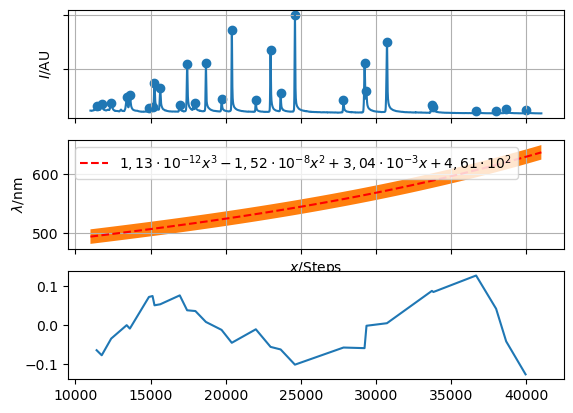

In [22]:
#peaks, params = scp.find_peaks(rubidium_transmission, prominence=0.1)
peaks = [41, 75,138,241,262,389,413,426,464,594,643,698,768,872,940,1100,1198,1265,1360,1683,1823,1836,1972,2271,2281,2565,2698,2765,2894]

fit_params, res, _, _, _= np.polyfit(rubidium_steps[peaks], rub_spec, 3, full=True)
steps2wavelength = np.poly1d(fit_params)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)
ax1.scatter(rubidium_steps[peaks], rubidium_transmission[peaks])
ax1.plot(rubidium_steps, rubidium_transmission)
ax1.set_yticklabels([])
ax1.set(ylabel="$I / \\mathrm{AU}$")
ax1.grid()

ax2.scatter(rubidium_steps[peaks], rub_spec)
steps = np.linspace(np.min(rubidium_steps), np.max(rubidium_steps), 100)
ax2.plot(steps, steps2wavelength(steps), 'r--',
         label="$1,13 \\cdot 10^{-12}x^3 - 1,52 \\cdot 10^{-8}x^2 + 3,04\\cdot 10^{-3}x + 4,61 \\cdot 10^{2}$")
ax2.set(xlabel="$x / \\mathrm{Steps}$", ylabel="$\\lambda / \\mathrm{nm}$")

residuals =steps2wavelength(rubidium_steps[peaks]) - rub_spec
std_residuals = np.std(residuals) * 200


ax2.fill_between(steps, steps2wavelength(steps)-std_residuals, steps2wavelength(steps)+std_residuals)
ax2.grid()
ax2.legend()
ax3.plot(rubidium_steps[peaks], residuals)
print()


fig.savefig("out/calbration.svg")

[1462, 1484, 1503, 1527, 1550, 1575, 1603, 1631, 1659, 1690, 1722, 1755, 1790, 1828, 1863, 1902, 1942, 1983, 2026, 2070, 2115, 2161, 2209, 2257, 2307, 2359, 2410, 2462, 2516, 2571, 2626, 2682, 2740, 2799, 2857, 2918, 2978, 3039]
            2
-0.0001264 x + 0.01248 x + 2.16
            2
-0.0001144 x + 0.01405 x + 2.04


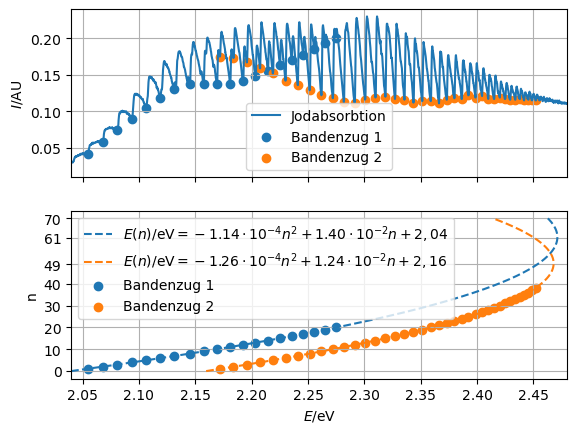

In [27]:
jod_energies = cnt.c * cnt.h / (steps2wavelength(jod_steps) *1e-9)  / cnt.e
fig3, (ax3, ax4) = plt.subplots(2,1, sharex=True)
peaks, params = scp.find_peaks(-jod_transmission, prominence=0.006)
peaks = [ 1462, 1484, 1503, 1527, 1550, 1575, 1603, 1631, 1659, 1690, 1722, 1755, 1790, 1828, 1863, 1902, 1942,
          1983, 2026, 2070, 2115, 2161, 2209, 2257, 2307, 2359, 2410, 2462, 2516, 2571, 2626, 2682, 2740, 2799, 2857, 2918, 2978, 3039]

peaksb = [2502, 2553, 2604, 2657, 2711, 2766, 2821, 2879, 2935, 2993, 3052, 3110, 3171, 3240, 3299, 3358, 3419, 3480, 3540, 3603]


print(peaks)

ax3.plot(jod_energies, jod_transmission, label="Jodabsorbtion")
ax3.scatter(jod_energies[peaksb], jod_transmission[peaksb], label="Bandenzug 1")
ax3.scatter(jod_energies[peaks], jod_transmission[peaks], label="Bandenzug 2")

#ax3.set_xticks(jod_energies[peaks])
ax3.grid()
#ax3.set(xlim=[590, 610], ylim=[0.01, 0.15])
ax3.set(xlim=[2.04, 2.48], ylim=[0.01, 0.24], ylabel="$I / \\mathrm{AU}$")


#fig4, ax4 = plt.subplots()
index_a = np.flip(np.arange(1, len(peaks) + 1, 1))
index_b = np.flip(np.arange(1, len(peaksb) + 1, 1))


fit_params_a = np.polyfit(index_a, jod_energies[peaks],2)
fit_a = np.poly1d(fit_params_a)

fit_params_b = np.polyfit(index_b, jod_energies[peaksb],2)
fit_b = np.poly1d(fit_params_b)

indexs = np.linspace(0,70,1000)
ax4.plot(fit_b(indexs), indexs , "--", label="$E(n) / \\mathrm{eV} = -1.14 \\cdot 10^{-4}  n^2 + 1.40 \\cdot 10^{-2} n + 2,04 $")
ax4.plot(fit_a(indexs),indexs, "--", label="$E(n) / \\mathrm{eV} = -1.26 \\cdot 10^{-4}  n^2 + 1.24 \\cdot 10^{-2} n + 2,16 $")
ax4.scatter(jod_energies[peaksb], index_b, label="Bandenzug 1")
ax4.scatter(jod_energies[peaks], index_a, label="Bandenzug 2")

maxa = round(indexs[np.argmax(fit_a(indexs))],0)
maxb =  round(indexs[np.argmax(fit_b(indexs))],0)

#ax4.axvline(maxa, c='tab:blue', linewidth=1)
#ax4.axvline(maxb, c='tab:orange', linewidth=1)

ax4.set_yticks([0,10,20,30,40, maxa, maxb, 70])
ax4.grid()

ax4.set(xlabel="$E / \\mathrm{eV}$", ylabel="n")

ax4.legend()
ax3.legend()
fig3.savefig("out/bandenzug.svg")

print(str(np.poly1d(fit_params_a)))
print(str(np.poly1d(fit_params_b)))

'$E(n) = -1.14 \\cdot 10^{-4}  n^ + 1.40 \\cdot 10^{-2} n + 2,04 $'